In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['KaiTi']  #中文
plt.rcParams['axes.unicode_minus'] = False   #负号

## 读取数据

In [79]:
columns=['carid', 'tradeTime', 'brand', 'serial', 'model', 'mileage', 'color','cityid', 'carCode', 'transferCount','seatings',
         'registerDate', 'licenseDate', 'country', 'maketype', 'modelyear', 'displacement','gearbox','oiltype', 'newprice', 
         'AF1', 'AF2', 'AF3', 'AF4', 'AF5','AF6', 'AF7', 'AF8', 'AF9', 'AF10', 'AF11','AF12', 'AF13', 'AF14','AF15', 'price']

data=pd.read_csv('附件1：估价训练数据.txt',sep='\t',header=None,names=columns) 
data2=pd.read_csv('附件2：估价验证数据.txt',sep='\t',header=None,names=columns[:-1]) 
data.head()

,carid,tradeTime,brand,serial,model,mileage,color,cityid,carCode,transferCount,seatings,registerDate,licenseDate,country,maketype,...,AF2,AF3,AF4,AF5,AF6,AF7,AF8,AF9,AF10,AF11,AF12,AF13,AF14,AF15,price
0,1,2021-06-28,1,1,1,4.01,1,1,1.0,0,5,2017-12-01,2018-01-26,779413.0,1.0,...,1,1,1.0,1,1,NaN,1.0,5.0,2.0,1,4220*1740*1625,201709.0,1,NaN,4.24
1,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,5,2016-12-01,2017-03-21,779415.0,2.0,...,2,2,2.0,2,2,NaN,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,NaN,7.38
2,5,2021-06-19,5,5,5,15.56,1,2,3.0,0,5,2008-02-01,2008-02-27,NaN,NaN,...,2,2,5.0,5,2,NaN,NaN,NaN,NaN,NaN,4515*1725*1445,NaN,2,NaN,1.00
3,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,5,2016-08-01,2016-09-09,779413.0,1.0,...,5,2,6.0,6,1,2018-08-18,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,NaN,4.38
4,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,5,2012-08-01,2012-08-28,779415.0,2.0,...,5,2,7.0,7,1,2020-09-20,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,NaN,5.90


In [80]:
data.infer_objects()
data2.infer_objects()
data.info() ,data2.info()#查看数据基础信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carid          30000 non-null  int64  
 1   tradeTime      30000 non-null  object 
 2   brand          30000 non-null  int64  
 3   serial         30000 non-null  int64  
 4   model          30000 non-null  int64  
 5   mileage        30000 non-null  float64
 6   color          30000 non-null  int64  
 7   cityid         30000 non-null  int64  
 8   carCode        29991 non-null  float64
 9   transferCount  30000 non-null  int64  
 10  seatings       30000 non-null  int64  
 11  registerDate   30000 non-null  object 
 12  licenseDate    30000 non-null  object 
 13  country        26243 non-null  float64
 14  maketype       26359 non-null  float64
 15  modelyear      29688 non-null  float64
 16  displacement   30000 non-null  float64
 17  gearbox        29999 non-null  float64
 18  oiltyp

(None, None)

## 数据清洗

<AxesSubplot:>

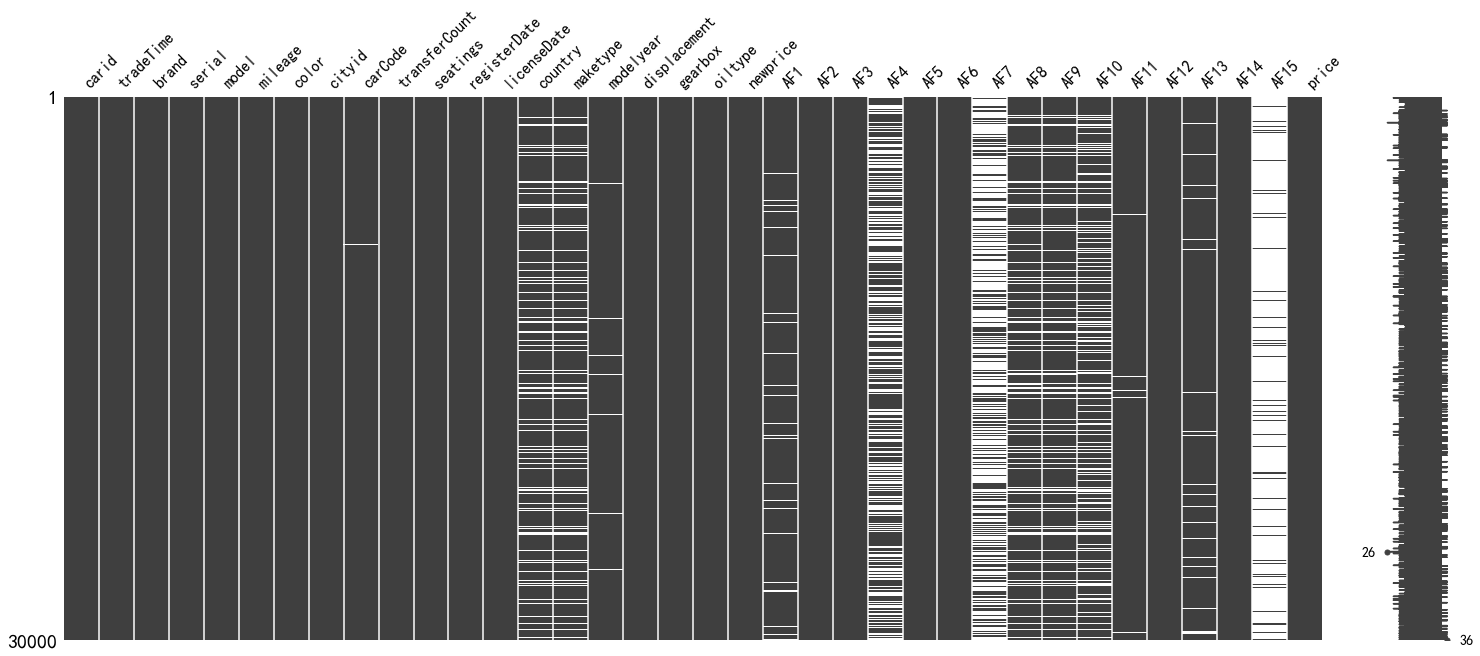

In [81]:
#观察缺失值
import missingno as msno
msno.matrix(data)

<AxesSubplot:>

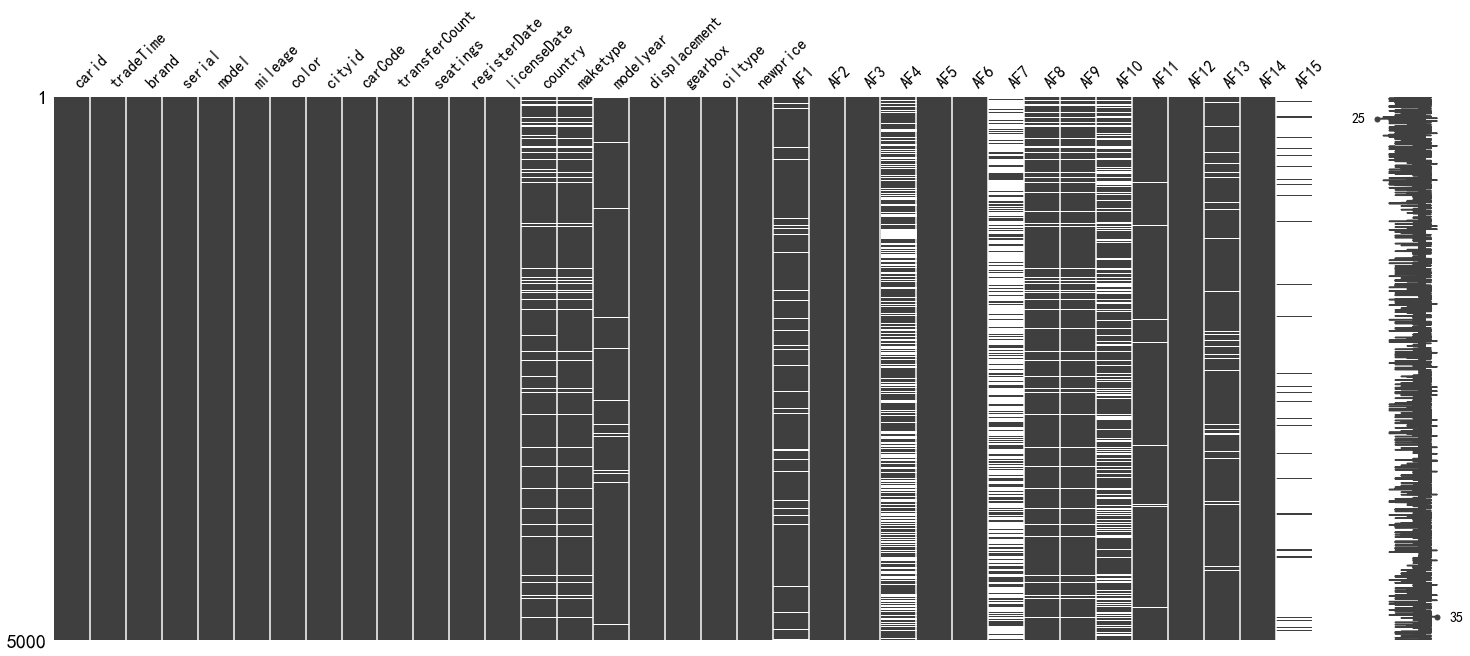

In [82]:
msno.matrix(data2)

In [83]:
#删除id序号
data.drop('carid',axis=1,inplace=True)
ID=data2['carid']

In [84]:
#若是有一行全为空值就删除
data.dropna(how='all',inplace=True)
data2.dropna(how='all',inplace=True)

In [85]:
#取值唯一的变量删除
for col in data.columns:
    if len(data[col].value_counts())==1:
        print(col)
        data.drop(col,axis=1,inplace=True)

In [86]:
#缺失到一定比例就删除
miss_ratio=0.15
for col in data.columns:
    if  data[col].isnull().sum()>data.shape[0]*miss_ratio:
        print(col)
        data.drop(col,axis=1,inplace=True)

AF4
AF7
AF10
AF15


In [87]:
#查看数值型数据,
pd.set_option('display.max_columns', 30)
data.select_dtypes(exclude=['object']).head()

,brand,serial,model,mileage,color,cityid,carCode,transferCount,seatings,country,maketype,modelyear,displacement,gearbox,oiltype,newprice,AF1,AF2,AF3,AF5,AF6,AF8,AF9,AF13,AF14,price
0,1,1,1,4.01,1,1,1.0,0,5,779413.0,1.0,2017.0,1.5,1.0,1,6.88,1.0,1,1,1,1,1.0,5.0,201709.0,1,4.24
1,2,2,2,8.60,1,2,1.0,0,5,779415.0,2.0,2017.0,1.2,2.0,1,11.98,1.0,2,2,2,2,2.0,4.0,201609.0,2,7.38
2,5,5,5,15.56,1,2,3.0,0,5,NaN,NaN,2008.0,1.6,4.0,1,12.78,1.0,2,2,5,2,NaN,NaN,NaN,2,1.00
3,6,6,6,6.04,1,3,1.0,3,5,779413.0,1.0,2016.0,1.3,2.0,1,9.49,1.0,5,2,6,1,2.0,5.0,201608.0,2,4.38
4,7,7,7,5.70,4,1,2.0,2,5,779415.0,2.0,2012.0,2.0,5.0,1,18.08,1.0,5,2,7,1,1.0,5.0,201204.0,1,5.90


#有的是分类数据，有的是日期,需要处理一下

In [88]:
#删除不要数值变量,不知道含义
data.drop('AF13',axis=1,inplace=True)

In [89]:
#计算异众比例
variation_ratio_s=0.1
for col in data.select_dtypes(exclude=['object']).columns:
    df_count=data[col].value_counts()
    kind=df_count.index[0]
    variation_ratio=1-(df_count.iloc[0]/len(data[col]))
    if variation_ratio<variation_ratio_s:
        print(f'{col} 最多的取值为{kind}，异众比例为{round(variation_ratio,4)},太小了，没区分度删掉')
        data.drop(col,axis=1,inplace=True)

oiltype 最多的取值为1，异众比例为0.032,太小了，没区分度删掉
AF1 最多的取值为1.0，异众比例为0.0544,太小了，没区分度删掉
AF3 最多的取值为2，异众比例为0.0184,太小了，没区分度删掉


In [90]:
#查看非数值型数据
data.select_dtypes(exclude=['int64','float64']).head()

,tradeTime,registerDate,licenseDate,AF11,AF12
0,2021-06-28,2017-12-01,2018-01-26,1,4220*1740*1625
1,2021-06-25,2016-12-01,2017-03-21,1+2,4630*1775*1480
2,2021-06-19,2008-02-01,2008-02-27,NaN,4515*1725*1445
3,2021-06-29,2016-08-01,2016-09-09,1,4500*1834*1707
4,2021-06-30,2012-08-01,2012-08-28,1,4315*1783*1606


#有用的等下构建特征去做特征，该独热独热，没用的才删除

In [91]:
#删除不要的字符变量
data.drop(['licenseDate','AF12'],axis=1,inplace=True)

In [92]:
#总结一下现在的变量，并给测试集也筛一下
columns=data.columns
print(columns)
data2=data2[columns[:-1]]   #y值不要

Index(['tradeTime', 'brand', 'serial', 'model', 'mileage', 'color', 'cityid',
       'carCode', 'transferCount', 'seatings', 'registerDate', 'country',
       'maketype', 'modelyear', 'displacement', 'gearbox', 'newprice', 'AF2',
       'AF5', 'AF6', 'AF8', 'AF9', 'AF11', 'AF14', 'price'],
      dtype='object')


### 填充缺失值

In [93]:
#均值填充，中位数填充，众数填充
#前填充，后填充
data.fillna(data.median(),inplace=True)   #mode,mean
data.fillna(method='ffill',inplace=True)   #pad,bfill/backfill

data2.fillna(data2.median(),inplace=True)   
data2.fillna(method='ffill',inplace=True)

## 特征工程

In [94]:
#首先对训练集取出y
y=data['price']
data.drop(['price'],axis=1,inplace=True)

In [95]:
#对前面的要处理的变量单独处理，
#时间类型变量的处理，得出二手车年龄，天数
data['age']=(pd.to_datetime(data['tradeTime'])-pd.to_datetime(data['registerDate'])).map(lambda x:x.days)
#测试集也一样变化
data2['age']=(pd.to_datetime(data2['tradeTime'])-pd.to_datetime(data2['registerDate'])).map(lambda x:x.days)

In [96]:
#然后删除原来的不需要的特征变量
data.drop(['tradeTime','registerDate'],axis=1,inplace=True)
data2.drop(['tradeTime','registerDate'],axis=1,inplace=True)

In [97]:
#可以映射
# d1={'male':0,'female':1}
# d2={'S':1,'C':2,'Q':3}

# data['Sex']=data['Sex'].map(d1)
# data['Embarked']=data['Embarked'].map(d2)
# data2['Sex']=data2['Sex'].map(d1)
# data2['Embarked']=data2['Embarked'].map(d2)

In [98]:
#剩下的变量独热处理
data=pd.get_dummies(data)
data2=pd.get_dummies(data2)

In [99]:
#独热多出来的特征处理
for col in data.columns:
    if col not in data2.columns:
        data2[col]=0

In [100]:
print(data.shape,data2.shape,y.shape)

(30000, 28) (5000, 28) (30000,)


In [101]:
#查看处理完的数据信息
data.info(),data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          30000 non-null  int64  
 1   serial         30000 non-null  int64  
 2   model          30000 non-null  int64  
 3   mileage        30000 non-null  float64
 4   color          30000 non-null  int64  
 5   cityid         30000 non-null  int64  
 6   carCode        30000 non-null  float64
 7   transferCount  30000 non-null  int64  
 8   seatings       30000 non-null  int64  
 9   country        30000 non-null  float64
 10  maketype       30000 non-null  float64
 11  modelyear      30000 non-null  float64
 12  displacement   30000 non-null  float64
 13  gearbox        30000 non-null  float64
 14  newprice       30000 non-null  float64
 15  AF2            30000 non-null  int64  
 16  AF5            30000 non-null  int64  
 17  AF6            30000 non-null  int64  
 18  AF8   

(None, None)

### 数据画图探索

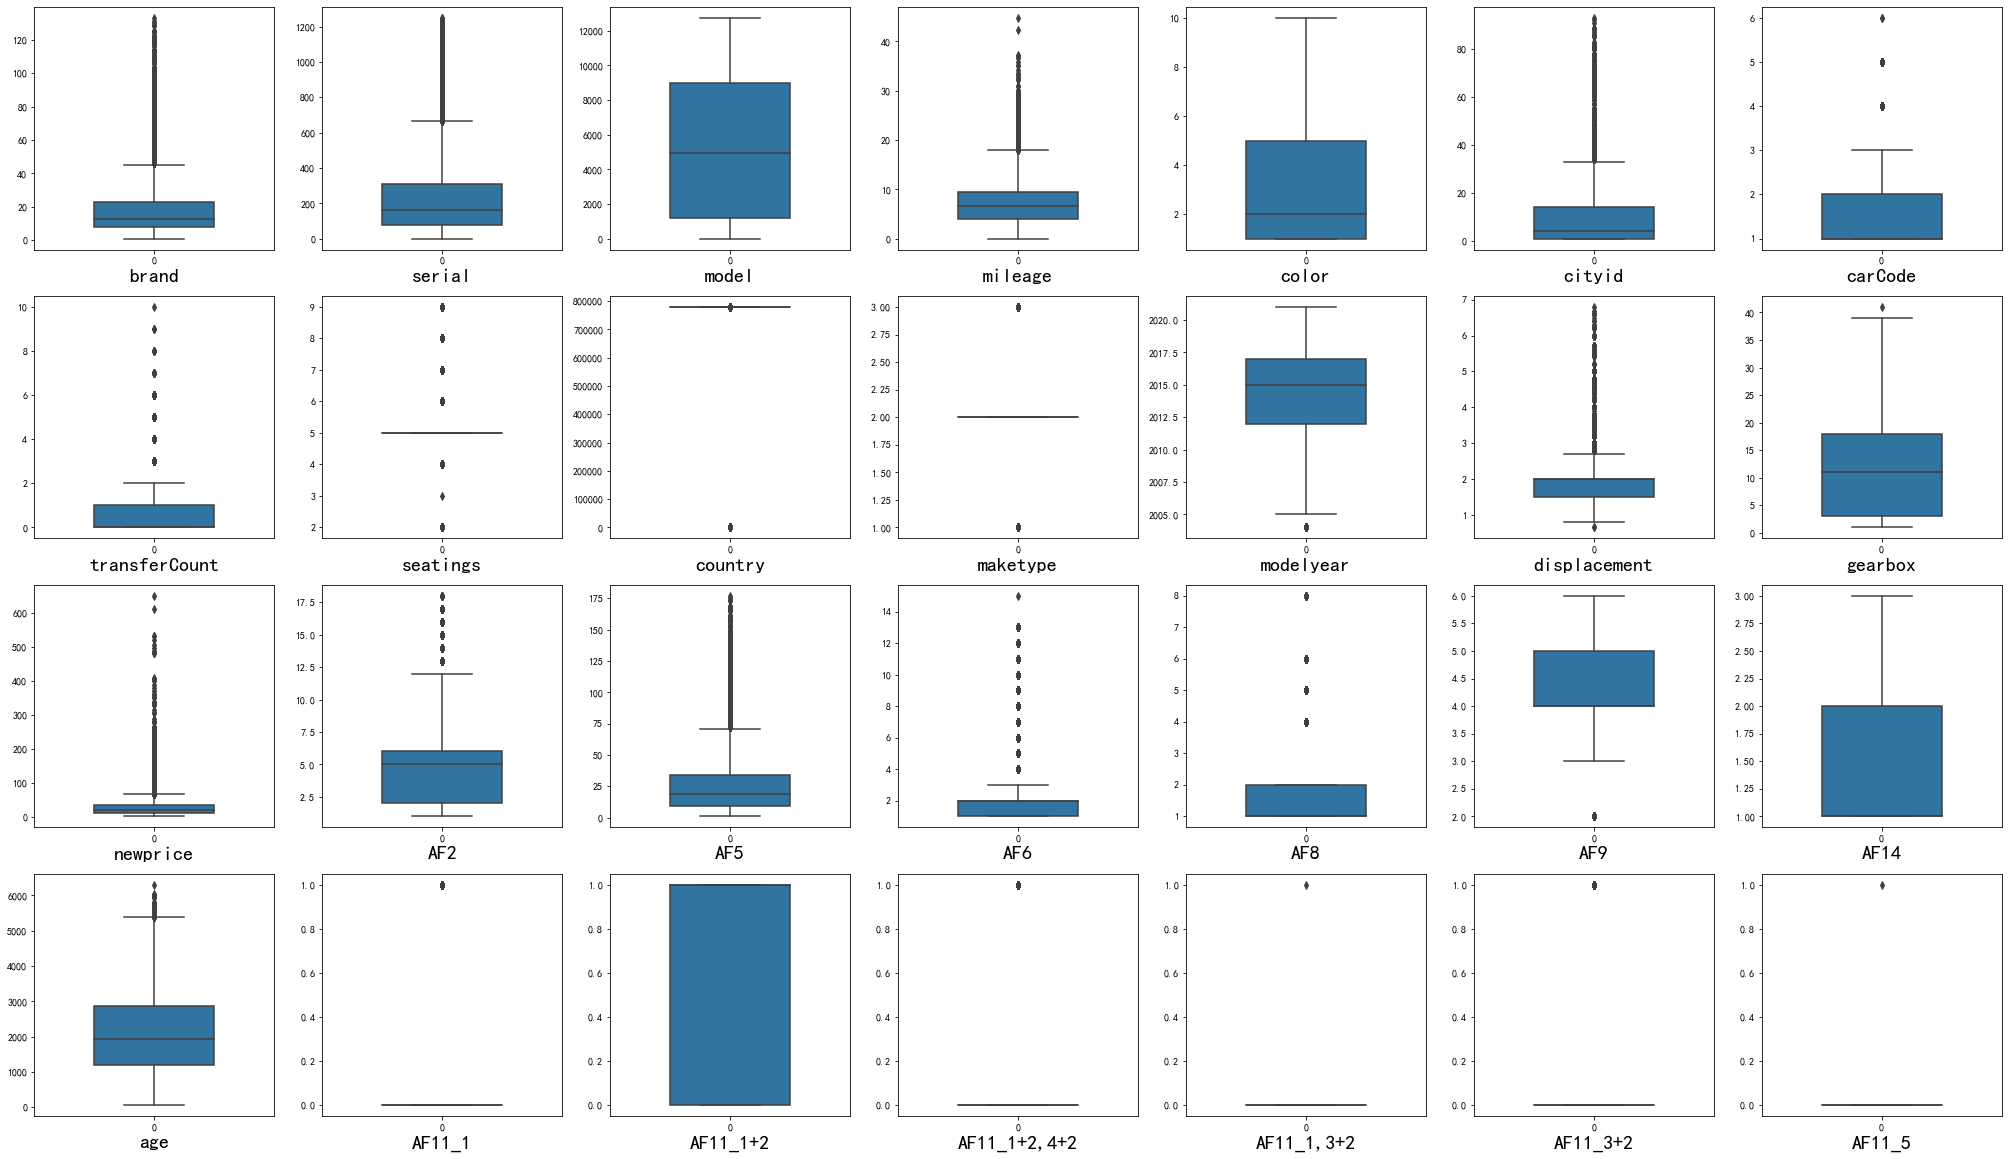

In [102]:
#查看特征变量的箱线图分布
columns = data.columns.tolist() # 列表头
dis_cols = 7                   #一行几个
dis_rows = len(columns)
plt.figure(figsize=(4 * dis_cols, 4 * dis_rows))

for i in range(len(columns)):
    plt.subplot(dis_rows,dis_cols,i+1)
    sns.boxplot(data=data[columns[i]], orient="v",width=0.5)
    plt.xlabel(columns[i],fontsize = 20)
plt.tight_layout()
#plt.savefig('特征变量箱线图',formate='png',dpi=500)
plt.show()

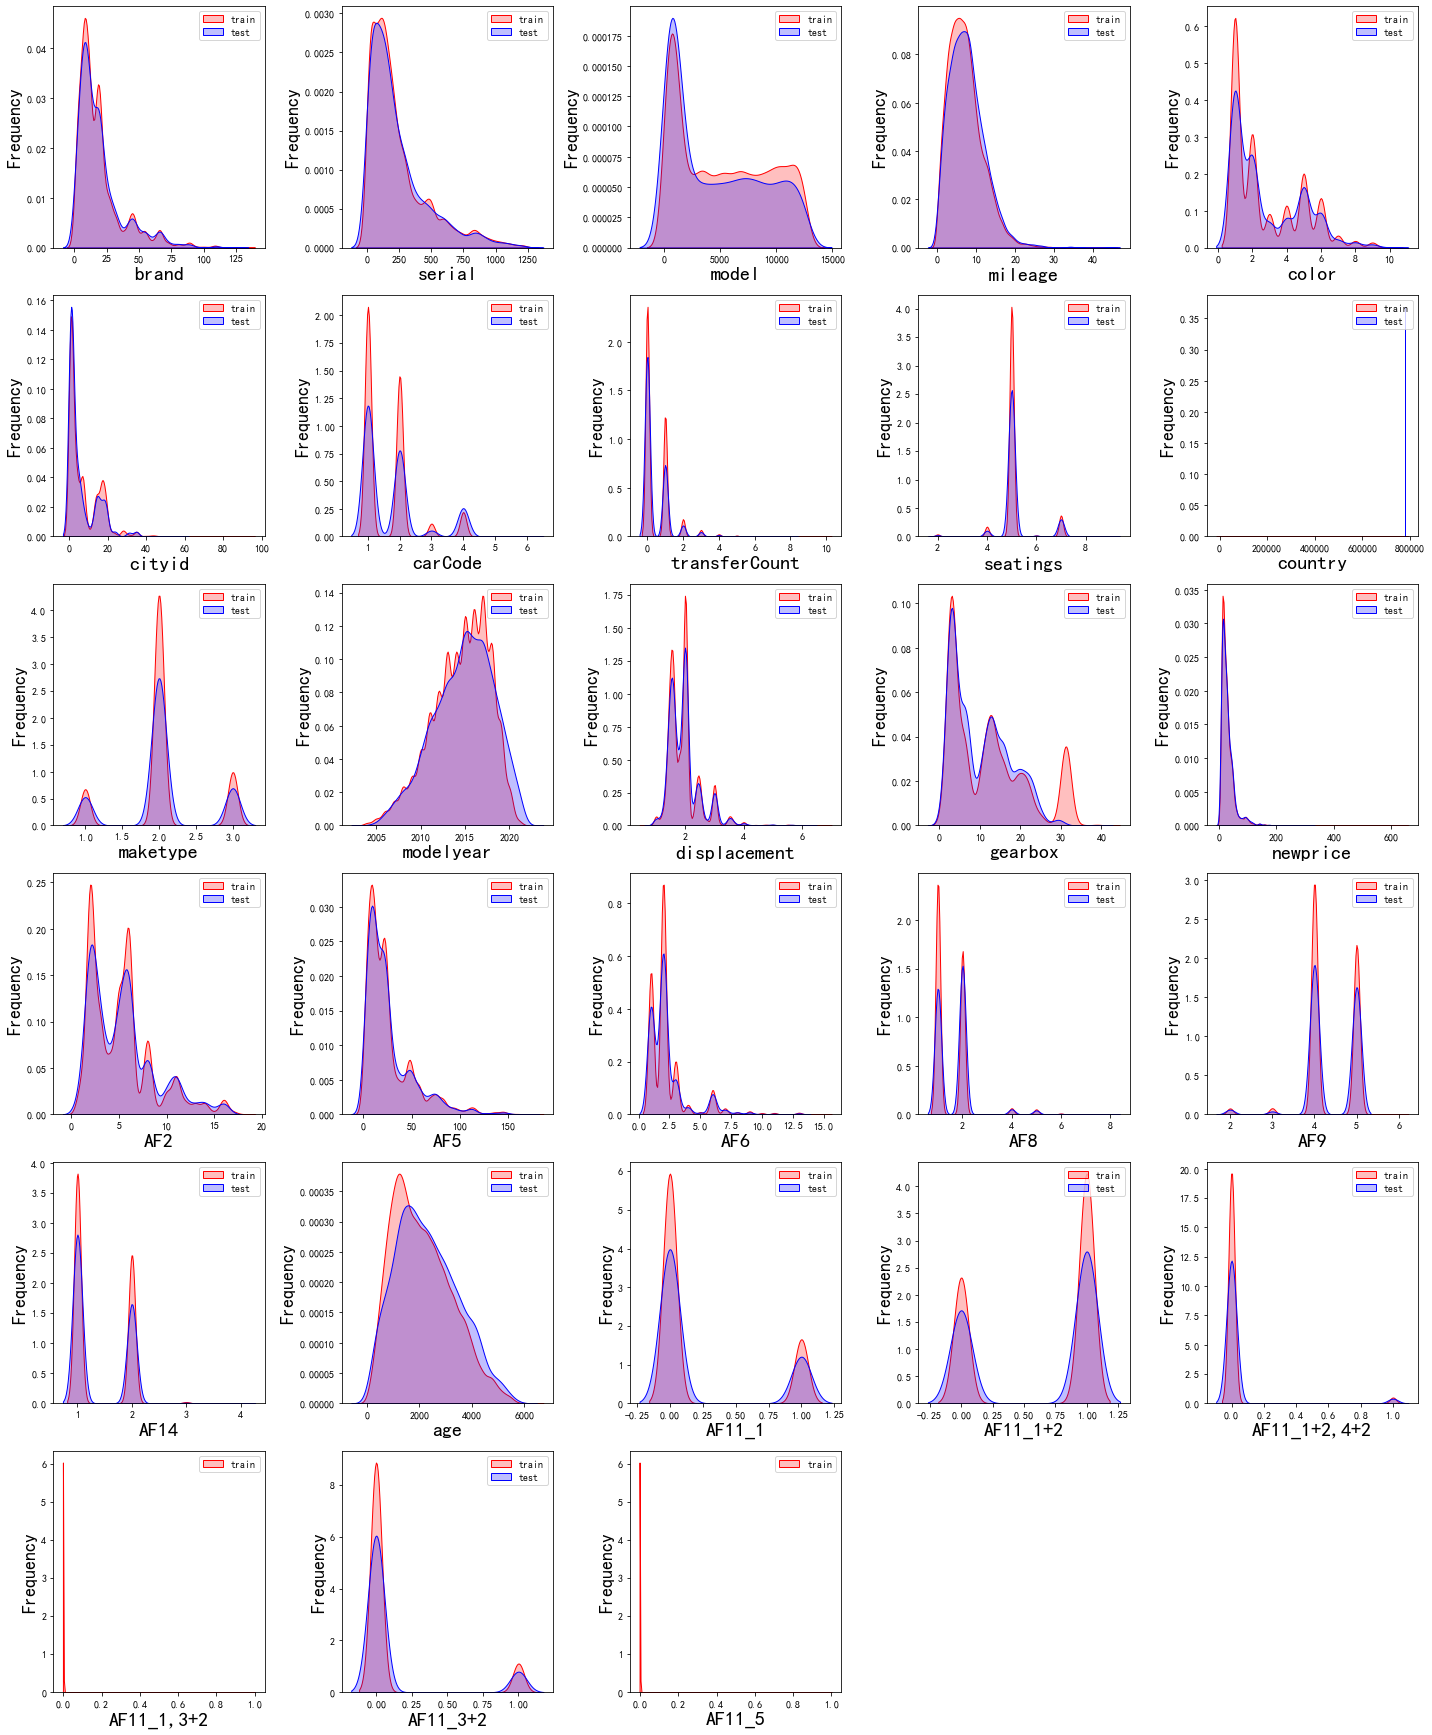

In [103]:
#画密度图，训练集和测试集对比
dis_cols = 5                   #一行几个
dis_rows = len(columns)
plt.figure(figsize=(4 * dis_cols, 4 * dis_rows))

for i in range(len(columns)):
    ax = plt.subplot(dis_rows, dis_cols, i+1)
    ax = sns.kdeplot(data[columns[i]], color="Red" ,shade=True)
    ax = sns.kdeplot(data2[columns[i]], color="Blue",warn_singular=False,shade=True)
    ax.set_xlabel(columns[i],fontsize = 20)
    ax.set_ylabel("Frequency",fontsize = 18)
    ax = ax.legend(["train", "test"])
plt.tight_layout()
#plt.savefig('训练测试特征变量核密度图',formate='png',dpi=500)
plt.show()

In [104]:
#选出分布不一样的特征,删除
drop_col=['country','AF11_1,3+2','AF11_5']
data.drop(drop_col,axis=1,inplace=True)
data2.drop(drop_col,axis=1,inplace=True)

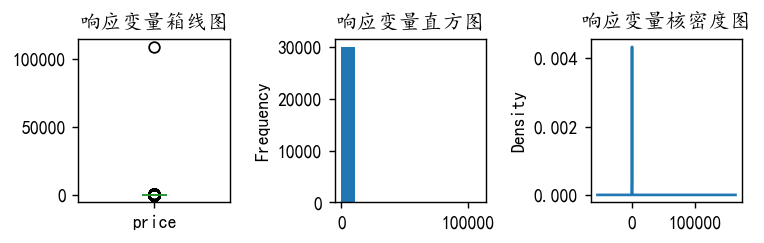

<Figure size 432x288 with 0 Axes>

In [105]:
# 查看y的分布
#回归问题
plt.figure(figsize=(6,2),dpi=128)
plt.subplot(1,3,1)
y.plot.box(title='响应变量箱线图')
plt.subplot(1,3,2)
y.plot.hist(title='响应变量直方图')
plt.subplot(1,3,3)
y.plot.kde(title='响应变量核密度图')
#sns.kdeplot(y, color='Red', shade=True)
#plt.savefig('响应变量.png')
plt.tight_layout()
plt.show()

# 分类问题
# plt.figure(figsize=(6,2),dpi=128)
# plt.subplot(1,3,1)
# y.value_counts().plot.bar(title='响应变量柱状图图')
# plt.subplot(1,3,2)
# y.value_counts().plot.pie(title='响应变量饼图')
# plt.subplot(1,3,3)
# y.plot.kde(title='响应变量核密度图')
# plt.savefig('响应变量.png')
plt.tight_layout()
# plt.show()

#上图的y存在着极端值，要筛掉

### 异常值处理

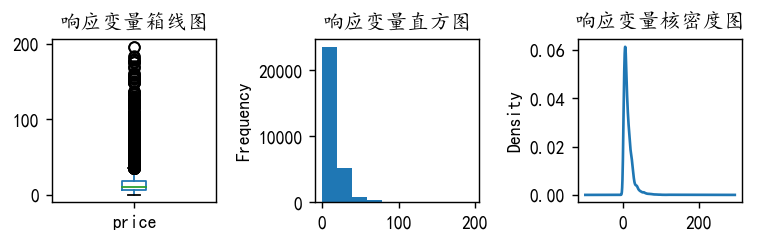

In [106]:
#处理y的异常值
y=y[y <= 200]
plt.figure(figsize=(6,2),dpi=128)
plt.subplot(1,3,1)
y.plot.box(title='响应变量箱线图')
plt.subplot(1,3,2)
y.plot.hist(title='响应变量直方图')
plt.subplot(1,3,3)
y.plot.kde(title='响应变量核密度图')
#sns.kdeplot(y, color='Red', shade=True)
#plt.savefig('响应变量.png')
plt.tight_layout()
plt.show()

In [107]:
#筛选给x
data=data.iloc[y.index,:]
data.shape

(29980, 25)

In [108]:
#X异常值处理，先标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(data)
X2_s = scaler.fit_transform(data2)

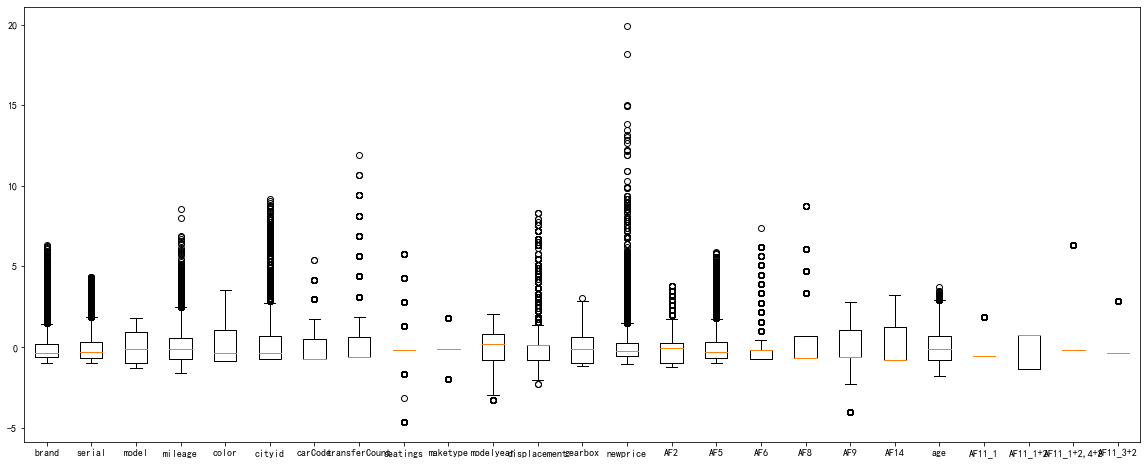

In [109]:
plt.figure(figsize=(20,8))
plt.boxplot(x=X_s,labels=data.columns)
#plt.hlines([-10,10],0,len(columns))
plt.show()

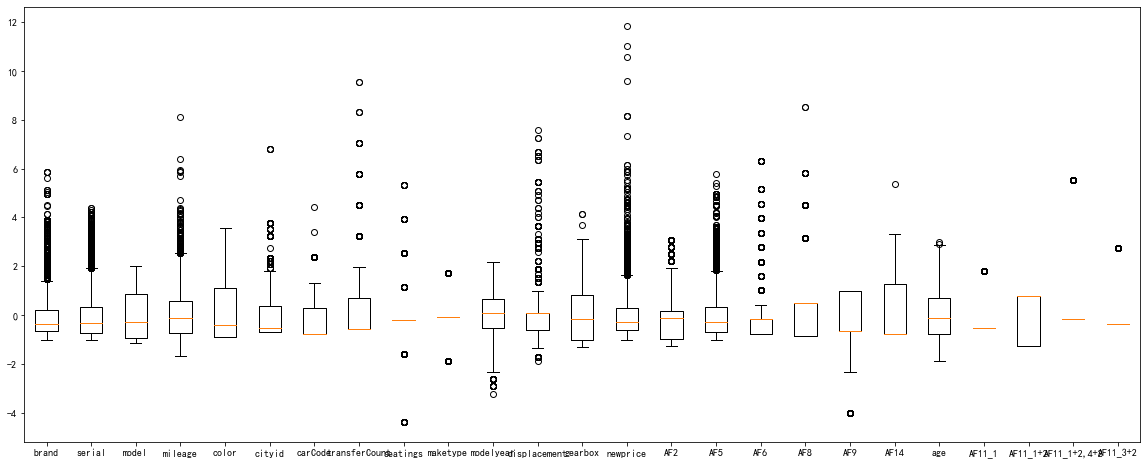

In [110]:
plt.figure(figsize=(20,8))
plt.boxplot(x=X2_s,labels=data2.columns)
#plt.hlines([-10,10],0,len(columns))
plt.show()

In [111]:
#异常值多的列进行处理
def deal_outline(data,col,n):   #数据，要处理的列名，几倍的方差
    for c in col:
        mean=data[c].mean()
        std=data[c].std()
        return data[(data[c]>mean-n*std)&(data[c]<mean+n*std)]

In [112]:
data=deal_outline(data,['newprice'],10)
y=y[data.index]
data.shape,y.shape

((29961, 25), (29961,))

### 查看相关系数矩阵

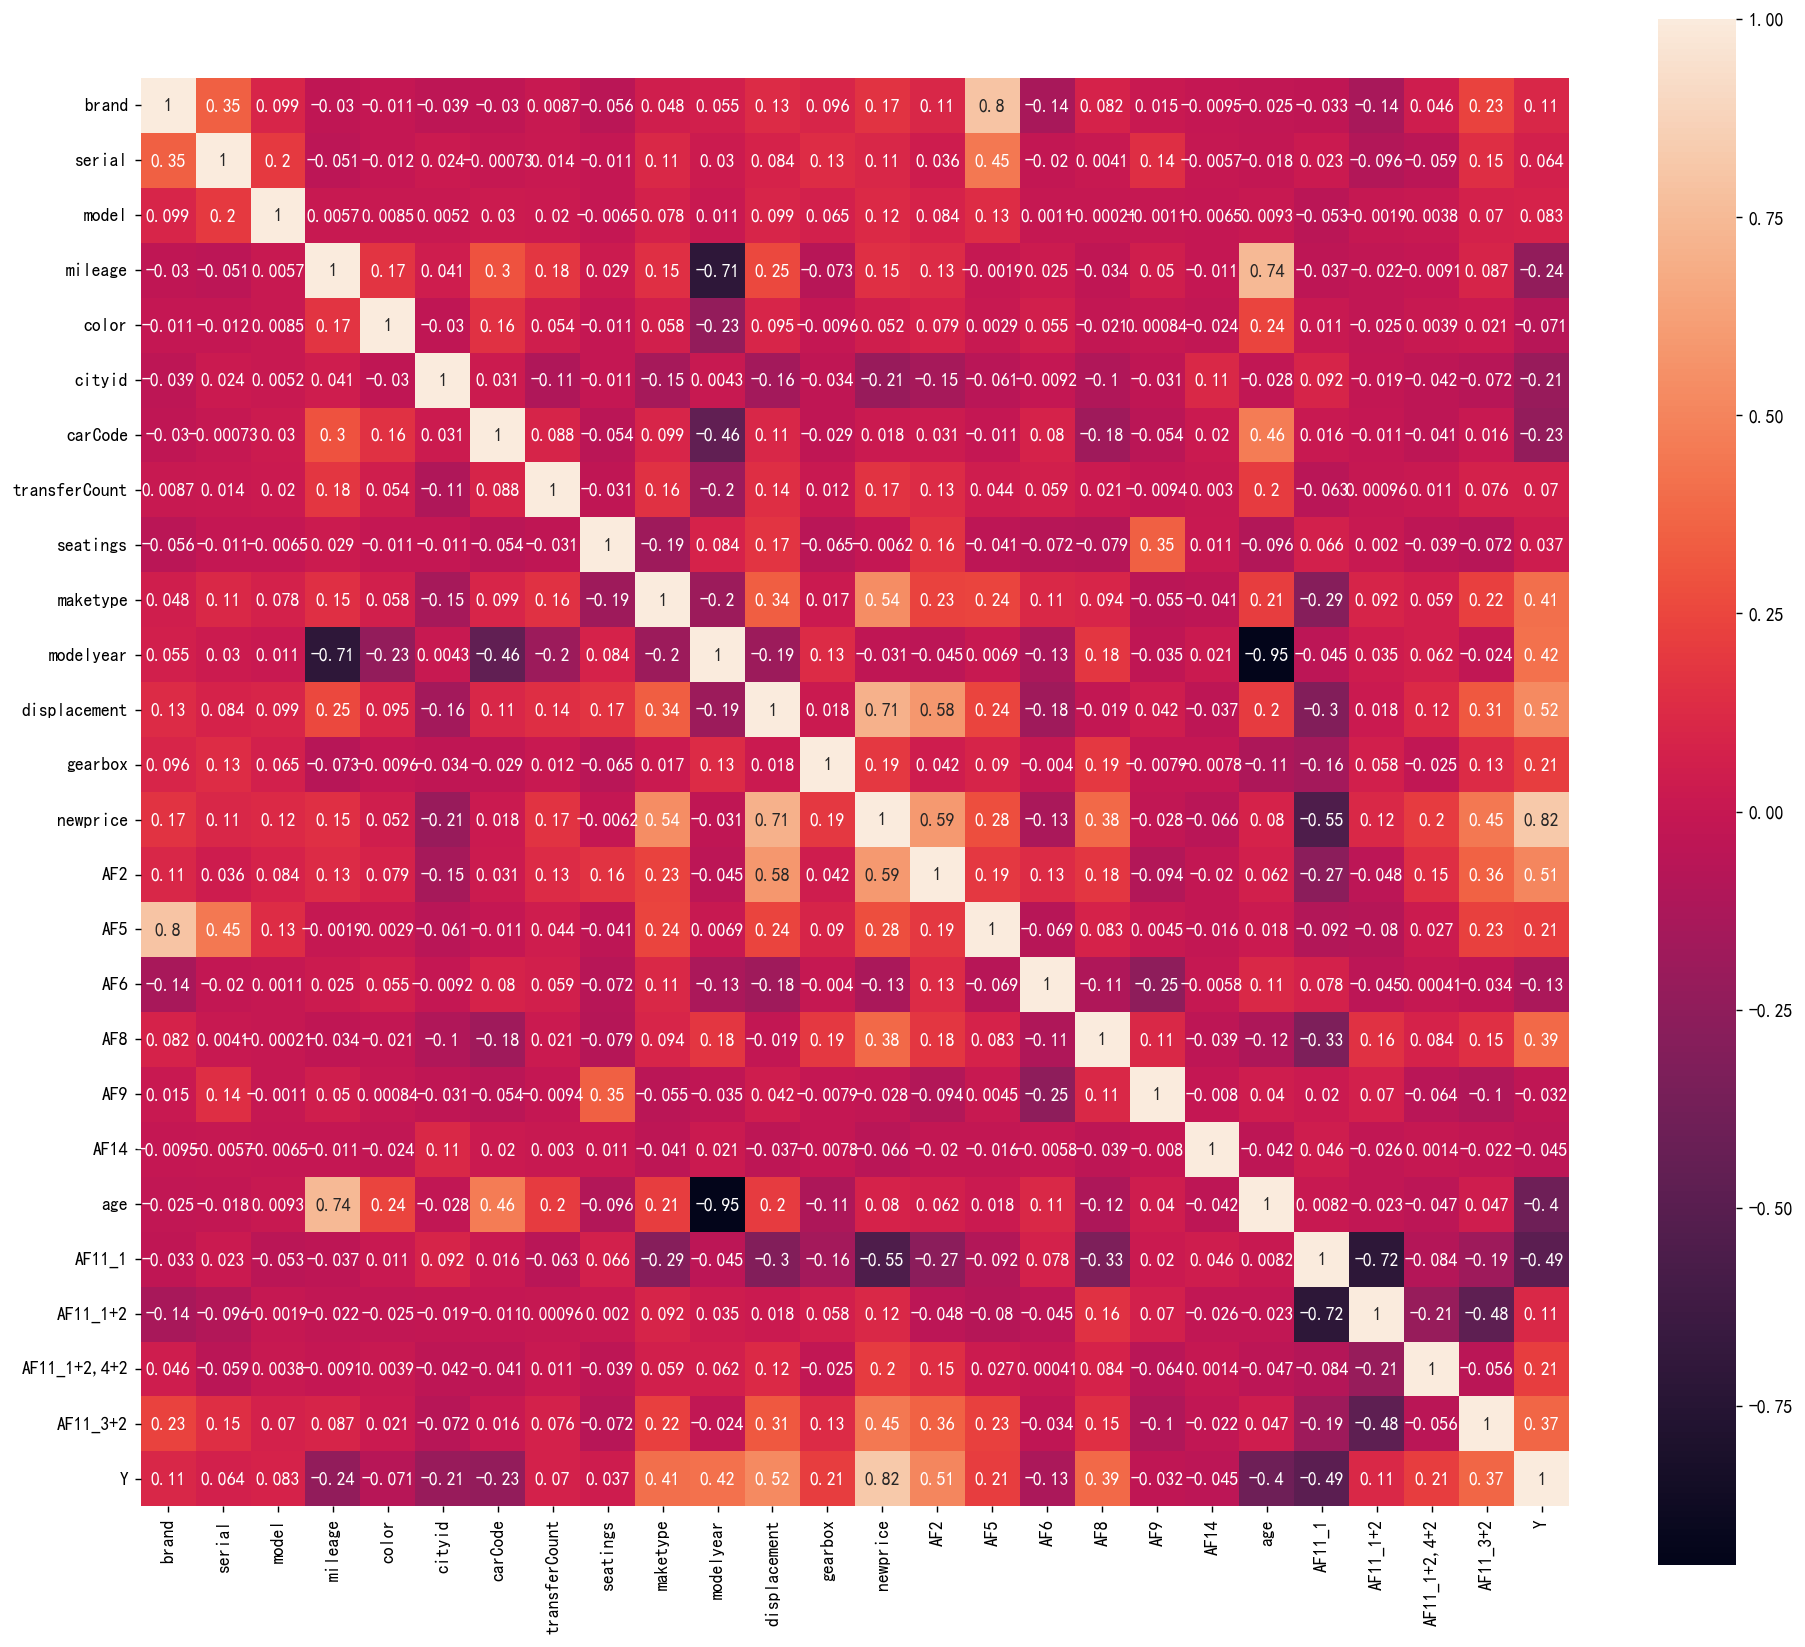

In [113]:
corr = plt.subplots(figsize = (18,16),dpi=128)
corr= sns.heatmap(data.assign(Y=y).corr(method='spearman'),annot=True,square=True)

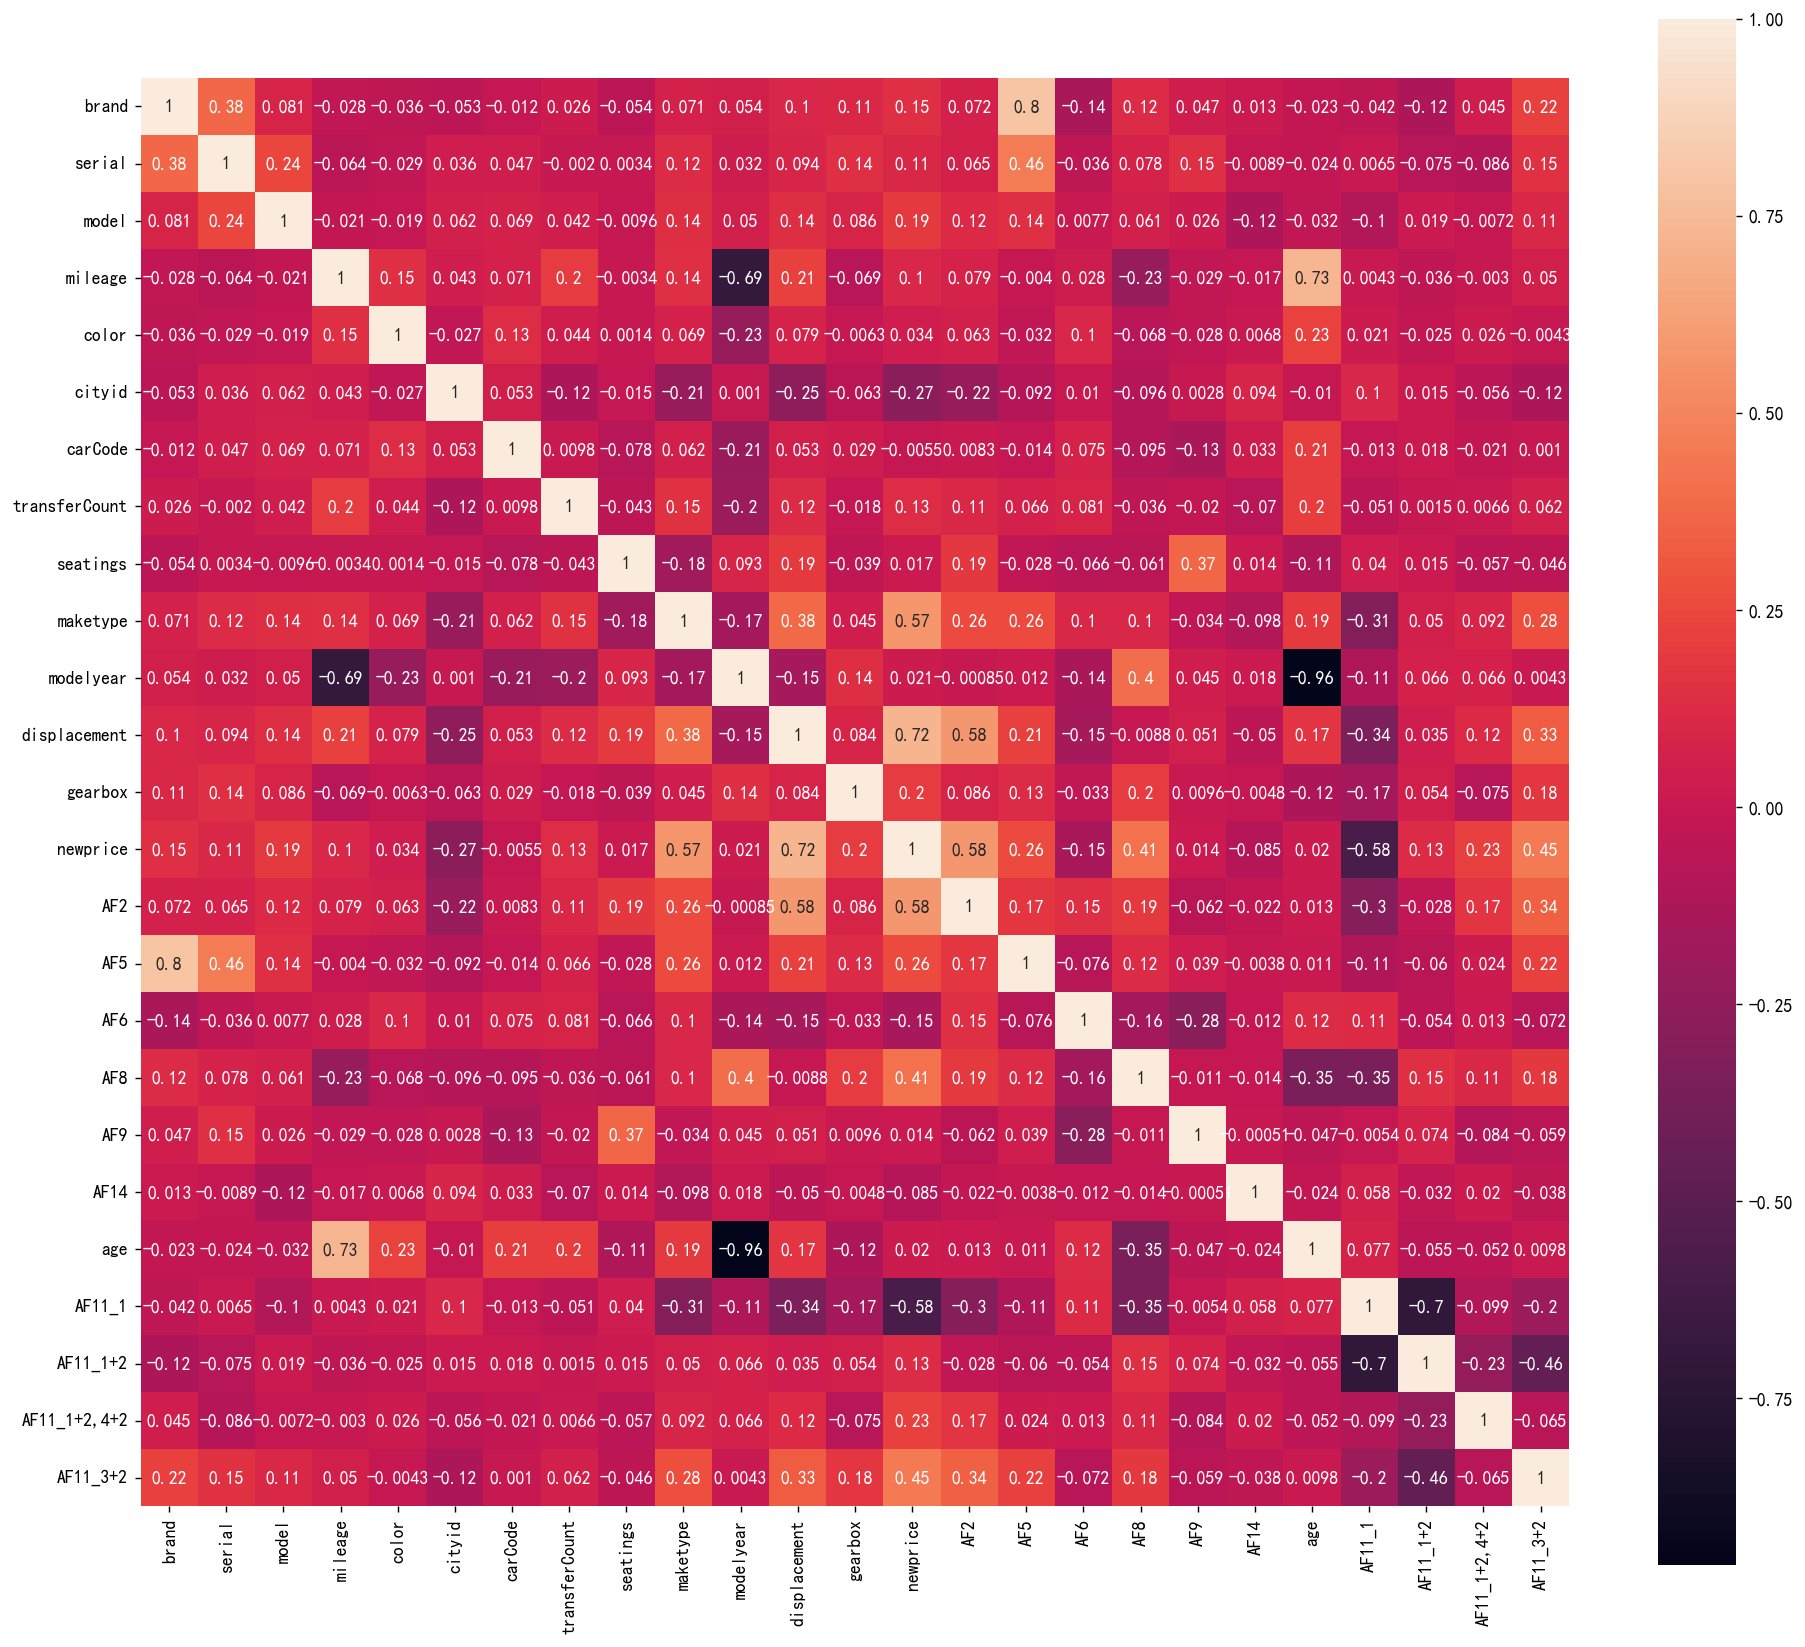

In [114]:
corr = plt.subplots(figsize = (18,16),dpi=128)
corr= sns.heatmap(data2.corr(method='spearman'),annot=True,square=True)

## 开始机器学习！

In [115]:
#划分训练集和验证集
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(data,y,test_size=0.2,random_state=0)

In [116]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)
X2_s=scaler.transform(data2)
print('训练数据形状：')
print(X_train_s.shape,y_train.shape)
print('验证测试数据形状：')
(X_val_s.shape,y_val.shape,X2_s.shape)

训练数据形状：
(23968, 25) (23968,)
验证测试数据形状：


((5993, 25), (5993,), (5000, 25))

In [117]:
#采用十种模型，对比验证集精度
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [41]:
#线性回归
model1 = LinearRegression()

#弹性网回归
model2 = ElasticNet(alpha=0.05, l1_ratio=0.5)

#K近邻
model3 = KNeighborsRegressor(n_neighbors=10)

#决策树
model4 = DecisionTreeRegressor(random_state=77)

#随机森林
model5= RandomForestRegressor(n_estimators=500,  max_features=int(X_train.shape[1]/3) , random_state=0)

#梯度提升
model6 = GradientBoostingRegressor(n_estimators=500,random_state=123)

#极端梯度提升
model7 =  XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=0)

#轻量梯度提升
model8 = LGBMRegressor(n_estimators=1000,objective='regression', # 默认是二分类
                      random_state=0)

#支持向量机
model9 = SVR(kernel="rbf")

#神经网络
model10 = MLPRegressor(hidden_layer_sizes=(16,8), random_state=77, max_iter=10000)

model_list=[model1,model2,model3,model4,model5,model6,model7,model8,model9,model10]
model_name=['线性回归','惩罚回归','K近邻','决策树','随机森林','梯度提升','极端梯度提升','轻量梯度提升','支持向量机','神经网络']

In [42]:
for i in range(10):
    model_C=model_list[i]
    name=model_name[i]
    model_C.fit(X_train_s, y_train)
    s=model_C.score(X_val_s, y_val)
    print(name+'方法在验证集的准确率为：'+str(s))

线性回归方法在验证集的准确率为：0.7584680526870519
惩罚回归方法在验证集的准确率为：0.7566416023299789
K近邻方法在验证集的准确率为：0.8546762519238685
决策树方法在验证集的准确率为：0.930951155277941
随机森林方法在验证集的准确率为：0.9644860143864413
梯度提升方法在验证集的准确率为：0.9618323536976034
极端梯度提升方法在验证集的准确率为：0.9694713034315952
轻量梯度提升方法在验证集的准确率为：0.9705572612616453
支持向量机方法在验证集的准确率为：0.7259004919925823
神经网络方法在验证集的准确率为：0.9318712490163676


#一般集成方法都最好，后面交叉验证、网格搜参都只选三个模型，随机森林，极端梯度提升，轻量梯度提升

### 交叉验证

In [42]:
#回归问题交叉验证，使用拟合优度，mae,rmse,mape 作为评价标准
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def evaluation(y_test, y_predict):
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    mape=(abs(y_predict -y_test)/ y_test).mean()
    return mae, rmse, mape
def evaluation2(lis):
    array=np.array(lis)
    return array.mean() , array.std()

In [44]:
def cross_val(model=None,X=None,Y=None,K=5,repeated=1):
    df_mean=pd.DataFrame(columns=['R2','MAE','RMSE','MAPE']) 
    df_std=pd.DataFrame(columns=['R2','MAE','RMSE','MAPE'])
    for n in range(repeated):
        print(f'正在进行第{n+1}次重复K折.....随机数种子为{n}\n')
        kf = KFold(n_splits=K, shuffle=True, random_state=n)
        R2=[]
        MAE=[]
        RMSE=[]
        MAPE=[]
        print(f"    开始本次在{K}折数据上的交叉验证.......\n")
        i=1
        for train_index, test_index in kf.split(X):
            print(f'        正在进行第{i}折的计算')
            X_train=X.values[train_index]
            y_train=y.values[train_index]
            X_test=X.values[test_index]
            y_test=y.values[test_index]
            model.fit(X_train,y_train)
            score=model.score(X_test,y_test)
            R2.append(score)
            pred=model.predict(X_test)
            mae, rmse, mape=evaluation(y_test, pred)
            MAE.append(mae)
            RMSE.append(rmse)
            MAPE.append(mape)
            print(f'        第{i}折的拟合优度为：{round(score,4)}，MAE为{round(mae,4)}，RMSE为{round(rmse,4)}，MAPE为{round(mape,4)}')
            i+=1
        print(f'    ———————————————完成本次的{K}折交叉验证———————————————————\n')
        R2_mean,R2_std=evaluation2(R2)
        MAE_mean,MAE_std=evaluation2(MAE)
        RMSE_mean,RMSE_std=evaluation2(RMSE)
        MAPE_mean,MAPE_std=evaluation2(MAPE)
        print(f'第{n+1}次重复K折，本次{K}折交叉验证的总体拟合优度均值为{R2_mean}，方差为{R2_std}')
        print(f'                               总体MAE均值为{MAE_mean}，方差为{MAE_std}')
        print(f'                               总体RMSE均值为{RMSE_mean}，方差为{RMSE_std}')
        print(f'                               总体MAPE均值为{MAPE_mean}，方差为{MAPE_std}')
        print("\n====================================================================================================================\n")
        df1=pd.DataFrame(dict(zip(['R2','MAE','RMSE','MAPE'],[R2_mean,MAE_mean,RMSE_mean,MAPE_mean])),index=[n])
        df_mean=pd.concat([df_mean,df1])
        df2=pd.DataFrame(dict(zip(['R2','MAE','RMSE','MAPE'],[R2_std,MAE_std,RMSE_std,MAPE_std])),index=[n])
        df_std=pd.concat([df_std,df2])
    return df_mean,df_std

In [45]:
model = LGBMRegressor(n_estimators=1000,objective='regression',random_state=0)
lgb_crosseval,lgb_crosseval2=cross_val(model=model,X=data,Y=y,K=3,repeated=5)

正在进行第1次重复K折.....随机数种子为0

    开始本次在3折数据上的交叉验证.......

        正在进行第1折的计算
        第1折的拟合优度为：0.9708，MAE为1.0693，RMSE为2.318，MAPE为0.0911
        正在进行第2折的计算
        第2折的拟合优度为：0.969，MAE为1.0417，RMSE为2.2811，MAPE为0.13
        正在进行第3折的计算
        第3折的拟合优度为：0.9802，MAE为1.0096，RMSE为1.845，MAPE为0.091
    ———————————————完成本次的3折交叉验证———————————————————

第1次重复K折，本次3折交叉验证的总体拟合优度均值为0.9733282931958619，方差为0.004921821573394262
                              总体MAE均值为1.0402158299304707，方差为0.02436669937130295
                              总体RMSE均值为2.148020316175142，方差为0.21481837556415379
                              总体MAPE均值为0.10403953721212324，方差为0.018365219097425584


正在进行第2次重复K折.....随机数种子为1

    开始本次在3折数据上的交叉验证.......

        正在进行第1折的计算
        第1折的拟合优度为：0.9732，MAE为1.0425，RMSE为2.1869，MAPE为0.129
        正在进行第2折的计算
        第2折的拟合优度为：0.9777，MAE为1.0012，RMSE为1.9685，MAPE为0.0886
        正在进行第3折的计算
        第3折的拟合优度为：0.9743，MAE为1.0398，RMSE为2.1019，MAPE为0.0913
    ———————————————完成本次的3折交叉验证———————————————————

第2次重复K折，本次3

In [46]:
lgb_crosseval

,R2,MAE,RMSE,MAPE
0,0.973328,1.040216,2.148020,0.104040
1,0.975048,1.027857,2.085768,0.102961
2,0.972788,1.044772,2.178370,0.103797
3,0.974365,1.040026,2.115083,0.103832
4,0.971323,1.038000,2.237451,0.103914


In [47]:
model = XGBRegressor(n_estimators=1000,objective='reg:squarederror',random_state=0)
xgb_crosseval,xgb_crosseval2=cross_val(model=model,X=data,Y=y,K=3,repeated=5)

正在进行第1次重复K折.....随机数种子为0

    开始本次在3折数据上的交叉验证.......

        正在进行第1折的计算
        第1折的拟合优度为：0.9704，MAE为1.1229，RMSE为2.3332，MAPE为0.0982
        正在进行第2折的计算
        第2折的拟合优度为：0.964，MAE为1.1077，RMSE为2.4574，MAPE为0.1393
        正在进行第3折的计算
        第3折的拟合优度为：0.9758，MAE为1.0688，RMSE为2.0417，MAPE为0.0963
    ———————————————完成本次的3折交叉验证———————————————————

第1次重复K折，本次3折交叉验证的总体拟合优度均值为0.9700564125868096，方差为0.004820018623518307
                              总体MAE均值为1.0998042356855355，方差为0.02281064909257025
                              总体RMSE均值为2.2774388327156894，方差为0.17421586917700976
                              总体MAPE均值为0.11128025970035656，方差为0.019822401524208128


正在进行第2次重复K折.....随机数种子为1

    开始本次在3折数据上的交叉验证.......

        正在进行第1折的计算
        第1折的拟合优度为：0.9718，MAE为1.1108，RMSE为2.2395，MAPE为0.1359
        正在进行第2折的计算
        第2折的拟合优度为：0.9728，MAE为1.0752，RMSE为2.1719，MAPE为0.0949
        正在进行第3折的计算
        第3折的拟合优度为：0.9708，MAE为1.0995，RMSE为2.2406，MAPE为0.0983
    ———————————————完成本次的3折交叉验证———————————————————

第2次重

In [48]:
xgb_crosseval

,R2,MAE,RMSE,MAPE
0,0.970056,1.099804,2.277439,0.111280
1,0.971828,1.095150,2.217340,0.109700
2,0.968756,1.110095,2.333557,0.110293
3,0.970193,1.107946,2.279585,0.110912
4,0.969346,1.097023,2.312548,0.109838


In [49]:
model = RandomForestRegressor(n_estimators=500,  max_features=int(X_train.shape[1]/3) , random_state=0)
rf_crosseval,rf_crosseval2=cross_val(model=model,X=data,Y=y,K=3,repeated=5)

正在进行第1次重复K折.....随机数种子为0

    开始本次在3折数据上的交叉验证.......

        正在进行第1折的计算
        第1折的拟合优度为：0.9603，MAE为1.0951，RMSE为2.7032，MAPE为0.0983
        正在进行第2折的计算
        第2折的拟合优度为：0.9721，MAE为1.0597，RMSE为2.1628，MAPE为0.1404
        正在进行第3折的计算
        第3折的拟合优度为：0.9693，MAE为1.0485，RMSE为2.2974，MAPE为0.0962
    ———————————————完成本次的3折交叉验证———————————————————

第1次重复K折，本次3折交叉验证的总体拟合优度均值为0.967240583025808，方差为0.0050186574089659
                              总体MAE均值为1.0677669787811939，方差为0.019892146884863713
                              总体RMSE均值为2.387791085160071，方差为0.22966957857176265
                              总体MAPE均值为0.11162873420333201，方差为0.020363260595928866


正在进行第2次重复K折.....随机数种子为1

    开始本次在3折数据上的交叉验证.......

        正在进行第1折的计算
        第1折的拟合优度为：0.9654，MAE为1.0896，RMSE为2.4829，MAPE为0.138
        正在进行第2折的计算
        第2折的拟合优度为：0.9692，MAE为1.0359，RMSE为2.3146，MAPE为0.0939
        正在进行第3折的计算
        第3折的拟合优度为：0.9695，MAE为1.0679，RMSE为2.2904，MAPE为0.0992
    ———————————————完成本次的3折交叉验证———————————————————

第2次重复K折

In [50]:
rf_crosseval

,R2,MAE,RMSE,MAPE
0,0.967241,1.067767,2.387791,0.111629
1,0.968011,1.064473,2.362624,0.110366
2,0.965269,1.074954,2.460731,0.110910
3,0.967354,1.072380,2.387319,0.111179
4,0.966065,1.066543,2.432756,0.110522


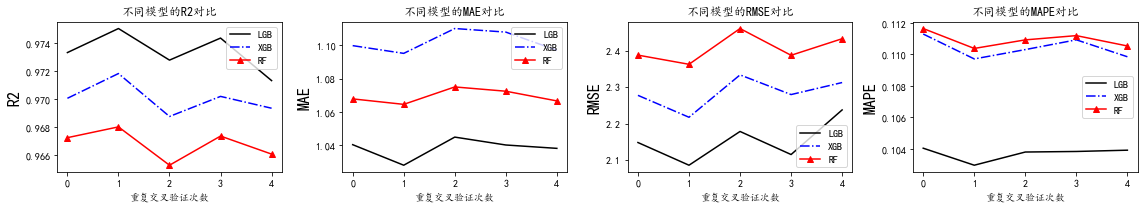

In [54]:
plt.subplots(1,4,figsize=(16,3))
for i,col in enumerate(lgb_crosseval.columns):
    n=int(str('14')+str(i+1))
    plt.subplot(n)
    plt.plot(lgb_crosseval[col], 'k', label='LGB')
    plt.plot(xgb_crosseval[col], 'b-.', label='XGB')
    plt.plot(rf_crosseval[col], 'r-^', label='RF')
    plt.title(f'不同模型的{col}对比')
    plt.xlabel('重复交叉验证次数')
    plt.ylabel(col,fontsize=16)
    plt.legend()
plt.tight_layout()
plt.show()

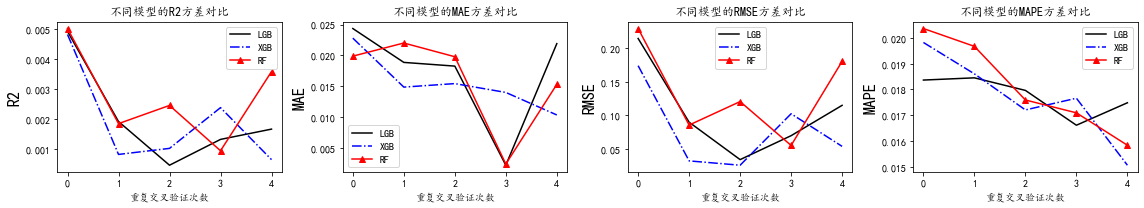

In [55]:
plt.subplots(1,4,figsize=(16,3))
for i,col in enumerate(lgb_crosseval2.columns):
    n=int(str('14')+str(i+1))
    plt.subplot(n)
    plt.plot(lgb_crosseval2[col], 'k', label='LGB')
    plt.plot(xgb_crosseval2[col], 'b-.', label='XGB')
    plt.plot(rf_crosseval2[col], 'r-^', label='RF')
    plt.title(f'不同模型的{col}方差对比')
    plt.xlabel('重复交叉验证次数')
    plt.ylabel(col,fontsize=16)
    plt.legend()
plt.tight_layout()
plt.show()

LGB的效果最好，选它进行搜参

### 搜超参数

In [43]:
#利用K折交叉验证搜索最优超参数
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [46]:
# Choose best hyperparameters by RandomizedSearchCV
#随机搜索决策树的参数
param_distributions = {'max_depth': range(4, 10), 'subsample':np.linspace(0.5,1,5 ),'num_leaves': [15, 31, 63, 127],
                       'colsample_bytree': [0.6, 0.7, 0.8, 1.0]}
                        # 'min_child_weight':np.linspace(0,0.1,2 ),
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
model =RandomizedSearchCV(estimator= LGBMRegressor(objective='regression',random_state=0),
                          param_distributions=param_distributions, n_iter=200)
model.fit(X_train_s, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(objective='regression',
                                           random_state=0),
                   n_iter=200,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             1.0],
                                        'max_depth': range(4, 10),
                                        'num_leaves': [15, 31, 63, 127],
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])})

In [47]:
model.best_params_

{'subsample': 0.875,
 'num_leaves': 127,
 'max_depth': 9,
 'colsample_bytree': 0.8}

In [48]:
model = model.best_estimator_
model.score(X_val_s, y_val)

0.965855009461842

In [52]:
#网格化搜索学习率和估计器个数
param_grid={'learning_rate': np.linspace(0.05,0.3,6 ), 'n_estimators':[100,500,1000,1500, 2000]}
model =GridSearchCV(estimator= LGBMRegressor(objective='regression',random_state=0), param_grid=param_grid, cv=3)
model.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=LGBMRegressor(objective='regression', random_state=0),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
                         'n_estimators': [100, 500, 1000, 1500, 2000]})

In [53]:
model.best_params_

{'learning_rate': 0.05, 'n_estimators': 2000}

In [54]:
model = model.best_estimator_
model.score(X_val_s, y_val)

0.9709377672804449

In [129]:
#利用找出来的最优超参数在所有的训练集上训练，然后预测
model=LGBMRegressor(objective='regression',subsample=0.875,learning_rate= 0.05,n_estimators= 2500,num_leaves=127,
                    max_depth= 9,colsample_bytree=0.8,random_state=0)
model.fit(X_train_s, y_train)
model.score(X_val_s, y_val)

0.9719550710478183

### 变量重要性排序图

In [126]:
model=LGBMRegressor(objective='regression',subsample=0.875,learning_rate= 0.05,n_estimators= 2500,num_leaves=127,
                    max_depth= 9,colsample_bytree=0.8,random_state=0)
model.fit(data.to_numpy(),y.to_numpy())
model.score(data.to_numpy(), y.to_numpy())

0.9988569635034842

Text(0.5, 1.0, 'Gradient Boosting')

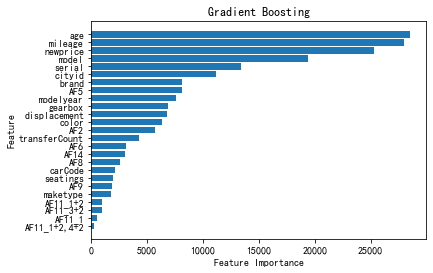

In [127]:
sorted_index = model.feature_importances_.argsort()
plt.barh(range(data.shape[1]), model.feature_importances_[sorted_index])
plt.yticks(np.arange(data.shape[1]), data.columns[sorted_index])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting')

### 预测储存

In [128]:
pred = model.predict(data2)
df=pd.DataFrame(ID)
df['price']=pred
df.to_csv('全部数据预测结果.csv',index=False)